In [ ]:
train_path = "drive/MyDrive/CottonPlantDiseases/Cotton Disease/train"
valid_path = "drive/MyDrive/CottonPlantDiseases/Cotton Disease/test"

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/CottonPlantDiseases/Cotton Disease/train/*')

In [ ]:
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
61/61 [==============================] - 931s 15s/step - loss: 1.0566 - accuracy: 0.5750 - val_loss: 0.2270 - val_accuracy: 0.9340
Epoch 2/5
61/61 [==============================] - 931s 15s/step - loss: 0.2320 - accuracy: 0.9148 - val_loss: 0.1958 - val_accuracy: 0.9151
Epoch 3/5
61/61 [==============================] - 925s 15s/step - loss: 0.1776 - accuracy: 0.9338 - val_loss: 0.2005 - val_accuracy: 0.8962
Epoch 4/5
61/61 [==============================] - 930s 15s/step - loss: 0.1724 - accuracy: 0.9457 - val_loss: 0.1347 - val_accuracy: 0.9434
Epoch 5/5
61/61 [==============================] - 927s 15s/step - loss: 0.1141 - accuracy: 0.9625 - val_loss: 0.1182 - val_accuracy: 0.9623


In [ ]:
print("training_accuracy", r.history['accuracy'][-1])
print("validation_accuracy", r.history['val_accuracy'][-1])
print("loss", r.history['loss'][-1])

training_accuracy 0.9610456228256226
validation_accuracy 0.9622641801834106
loss 0.11908075958490372


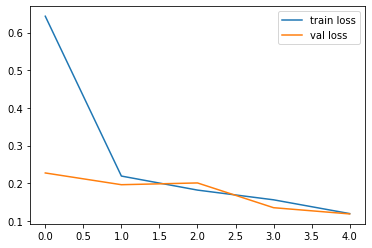

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


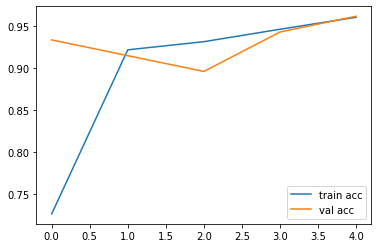

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [ ]:
label = test_set.classes

In [ ]:
pred= model.predict(test_set)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_set.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[3 3 1 0 2 2 1 1 0 0 2 2 3 0 1 0 1 0 1 1 2 2 2 0 3 1 3 1 2 1 0 2 1 2 0 3 2
 1 3 3 3 0 0 3 2 3 3 1 3 3 2 1 3 0 1 2 0 0 1 2 2 0 3 0 1 1 3 2 2 2 3 2 2 0
 3 2 3 1 3 3 2 1 0 1 0 1 2 3 2 2 0 1 1 1 3 1 0 3 3 1 2 2 0 3 0 0]
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
['fresh cotton plant', 'fresh cotton plant', 'diseased cotton plant', 'diseased cotton leaf', 'fresh cotton leaf', 'fresh cotton leaf', 'diseased cotton plant', 'diseased cotton plant', 'diseased cotton leaf', 'diseased cotton leaf', 'fresh cotton leaf', 'fresh cotton leaf', 'fresh cotton plant', 'diseased cotton leaf', 'diseased cotton plant', 'diseased cotton leaf', 'diseased cotton plant', 'diseased cotton leaf', 'diseased cotton plant', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton leaf', 'fresh cotton leaf', 'diseased cotton leaf', 'fresh cotton plant', 'diseased cotton plant', 'fresh cotton plant', 'diseased cotton plant', 'fresh cotton leaf', 'diseas

In [ ]:
model.save('CottonPlantVGG16.hdf5')